<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-in-libraries-and-data" data-toc-modified-id="Loading-in-libraries-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading in libraries and data</a></span><ul class="toc-item"><li><span><a href="#Renaming-columns" data-toc-modified-id="Renaming-columns-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Renaming columns</a></span></li></ul></li><li><span><a href="#Brief-EDA" data-toc-modified-id="Brief-EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Brief EDA</a></span><ul class="toc-item"><li><span><a href="#Histogram-of-megawatthours" data-toc-modified-id="Histogram-of-megawatthours-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Histogram of megawatthours</a></span></li><li><span><a href="#Statistics----minimum-and-max-values" data-toc-modified-id="Statistics----minimum-and-max-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Statistics -- minimum and max values</a></span></li></ul></li><li><span><a href="#Time-series-indexed-dataframe-by-hour" data-toc-modified-id="Time-series-indexed-dataframe-by-hour-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Time series indexed dataframe by hour</a></span><ul class="toc-item"><li><span><a href="#Net-generation-plot" data-toc-modified-id="Net-generation-plot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Net generation plot</a></span></li><li><span><a href="#Grouper----month" data-toc-modified-id="Grouper----month-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Grouper -- month</a></span></li><li><span><a href="#Monthly-plot----not-showing-subplots" data-toc-modified-id="Monthly-plot----not-showing-subplots-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Monthly plot -- not showing subplots</a></span></li><li><span><a href="#Focusing-on-an-outlier-in-late-January-2019" data-toc-modified-id="Focusing-on-an-outlier-in-late-January-2019-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Focusing on an outlier in late January 2019</a></span></li><li><span><a href="#Lag-plot----experiment-with-different-lags" data-toc-modified-id="Lag-plot----experiment-with-different-lags-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Lag plot -- experiment with different lags</a></span></li><li><span><a href="#Autocorrelation-plot" data-toc-modified-id="Autocorrelation-plot-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Autocorrelation plot</a></span></li><li><span><a href="#Plot-of-6-and-12-month-Simple-Moving-Average-analysis" data-toc-modified-id="Plot-of-6-and-12-month-Simple-Moving-Average-analysis-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Plot of 6 and 12 month Simple Moving Average analysis</a></span></li></ul></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#Boxcox-transform" data-toc-modified-id="Boxcox-transform-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Boxcox transform</a></span></li><li><span><a href="#Creating-date-time-month-and-day-columns" data-toc-modified-id="Creating-date-time-month-and-day-columns-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Creating date-time month and day columns</a></span></li><li><span><a href="#Lag-based-features" data-toc-modified-id="Lag-based-features-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Lag-based features</a></span></li><li><span><a href="#Sliding-and-expanding-window-summary-statistics-features" data-toc-modified-id="Sliding-and-expanding-window-summary-statistics-features-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Sliding and expanding window summary statistics features</a></span></li></ul></li></ul></div>

# Loading in libraries and data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.style as style
style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('solar-net-generation.csv', skiprows=4)

df.head(10)

,Category,Series ID: EBA.US48-ALL.NG.SUN.H megawatthours
0,12/29/2020 05H,50
1,12/29/2020 04H,63
2,12/29/2020 03H,73
3,12/29/2020 02H,76
4,12/29/2020 01H,117
5,12/29/2020 00H,2010
6,12/28/2020 23H,6394
7,12/28/2020 22H,10656
8,12/28/2020 21H,13931
9,12/28/2020 20H,16057


In [4]:
df.tail()

,Category,Series ID: EBA.US48-ALL.NG.SUN.H megawatthours
21884,07/1/2018 09H,25
21885,07/1/2018 08H,35
21886,07/1/2018 07H,0
21887,07/1/2018 06H,-1
21888,07/1/2018 05H,1


## Renaming columns

In [5]:
df = df.rename(columns={'Category':'Timestamp', 'Series ID: EBA.US48-ALL.NG.SUN.H megawatthours': 'Megawatthours'})

In [6]:
df.head(10)

,Timestamp,Megawatthours
0,12/29/2020 05H,50
1,12/29/2020 04H,63
2,12/29/2020 03H,73
3,12/29/2020 02H,76
4,12/29/2020 01H,117
5,12/29/2020 00H,2010
6,12/28/2020 23H,6394
7,12/28/2020 22H,10656
8,12/28/2020 21H,13931
9,12/28/2020 20H,16057


# Brief EDA

## Histogram of megawatthours

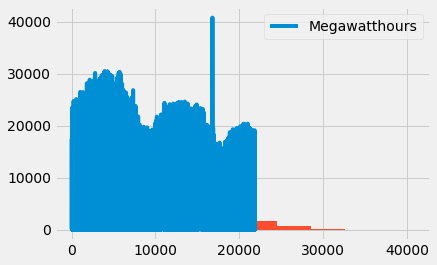

In [7]:
df.plot()
df['Megawatthours'].hist()
plt.show()

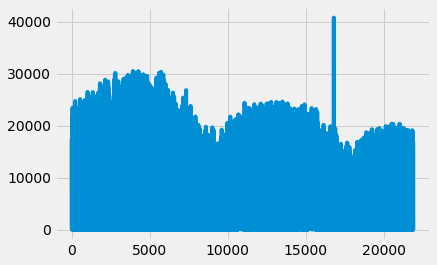

In [9]:
df['Megawatthours'].plot()

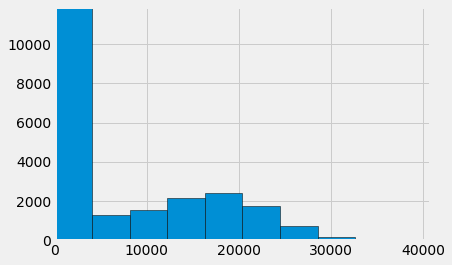

In [10]:
df['Megawatthours'].hist(grid=True,edgecolor="k").autoscale(enable=True,axis='both',tight=True)

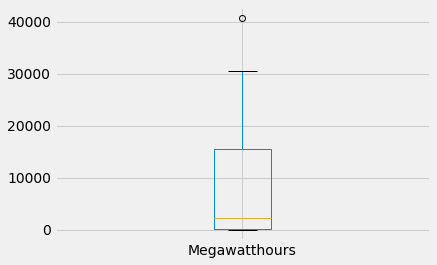

In [11]:
df['Megawatthours'].plot.box()

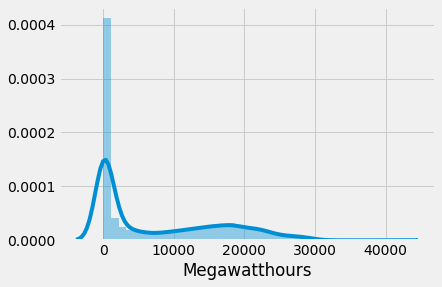

In [12]:
sns.distplot(df['Megawatthours'])

## Statistics -- minimum and max values

In [13]:
df.loc[::]['Megawatthours'].min()

-6

In [14]:
df.loc[::]['Megawatthours'].max()

40778

# Time series indexed dataframe by hour

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [16]:
time_df = df.copy()

time_df = time_df.set_index("Timestamp")
time_df.index.freq = '-1H'
time_df = time_df.sort_index()

time_df.head(10)

,Megawatthours
Timestamp,
2018-07-01 05:00:00,1
2018-07-01 06:00:00,-1
2018-07-01 07:00:00,0
2018-07-01 08:00:00,35
2018-07-01 09:00:00,25
2018-07-01 10:00:00,38
2018-07-01 11:00:00,306
2018-07-01 12:00:00,1043
2018-07-01 13:00:00,2525


In [17]:
time_df.tail()

,Megawatthours
Timestamp,
2020-12-29 01:00:00,117
2020-12-29 02:00:00,76
2020-12-29 03:00:00,73
2020-12-29 04:00:00,63
2020-12-29 05:00:00,50


In [18]:
time_df.describe()

,Megawatthours
count,21889.000000
mean,7634.605418
std,8826.847084
min,-6.000000
25%,117.000000
50%,2205.000000
75%,15562.000000
max,40778.000000


## Net generation plot

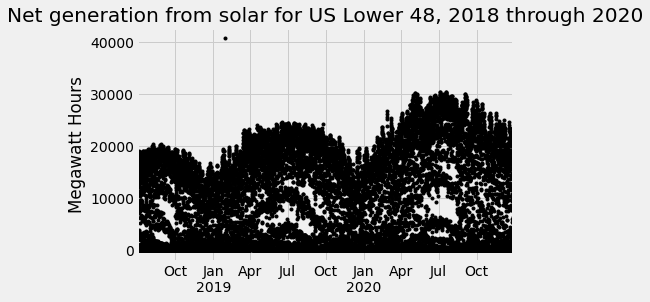

In [19]:
time_df.plot(style="k.")

fig = plt.gcf()
ax = plt.gca() 

ax.set_title("Net generation from solar for US Lower 48, 2018 through 2020")
ax.set_ylabel("Megawatt Hours")
ax.set_xlabel("")
ax.get_legend().remove()
fig.savefig("Netgen20182020solar.png",bbox_inches='tight')

## Grouper -- month

In [20]:
# groups = time_df['Megawatthours'].groupby(pd.Grouper(freq="MS"))

# # groups.groups.values()

# for g in groups:
#     print(g)
# # months = pd.DataFrame()

# # for name, group in month_groups:
# #     months[name.month] = group.values
    
# # months.plot(subplots=True, legend=False)
# # plt.show()

In [21]:
time_day_df = time_df.resample('D').sum()

time_day_df.head()

,Megawatthours
Timestamp,
2018-07-01,146982
2018-07-02,189039
2018-07-03,191610
2018-07-04,188984
2018-07-05,187447


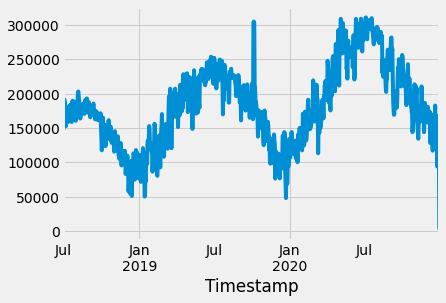

In [22]:
time_day_df.plot(legend=False)

In [23]:
time_month_df = time_df.resample('MS').sum()

time_month_df.head()

,Megawatthours
Timestamp,
2018-07-01,5434445
2018-08-01,5620360
2018-09-01,5151821
2018-10-01,4353376
2018-11-01,3448206


## Monthly plot -- not showing subplots

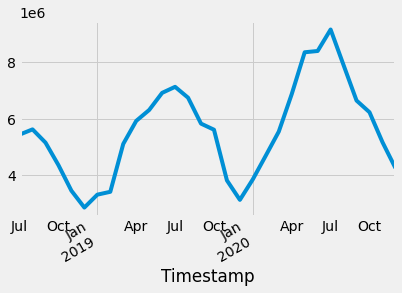

In [24]:
time_month_df.plot(subplots=True,legend=False)
plt.show()

In [25]:
time_yr_df = time_df.resample('A').sum()

time_yr_df.head()

,Megawatthours
Timestamp,
2018-12-31,26859653
2019-12-31,63205406
2020-12-31,77048819


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1394a9e48>],
      dtype=object)

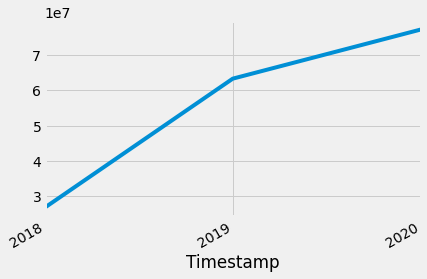

In [26]:
time_yr_df.plot(subplots=True,legend=False)

## Focusing on an outlier in late January 2019

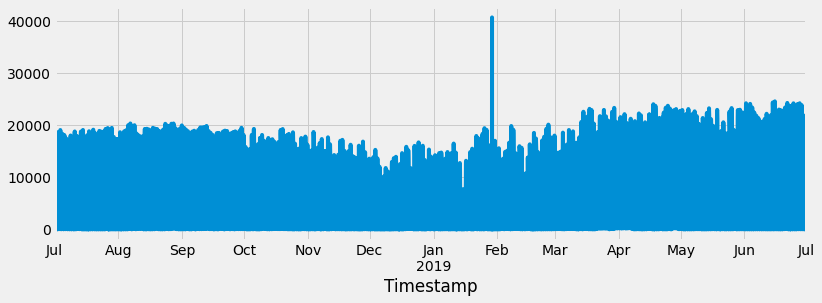

In [27]:
time_df['Megawatthours'].plot(figsize=(12,4),xlim=['2018-07-01','2019-07-01']);

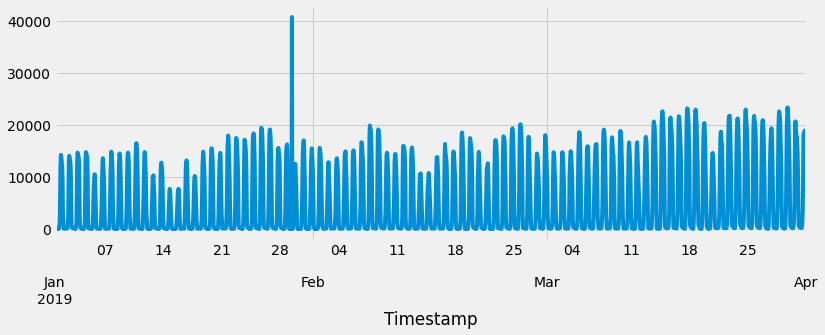

In [28]:
time_df['Megawatthours'].plot(figsize=(12,4),xlim=['2019-01-01','2019-04-01']);

    - (Would do ETS decomposition but negative/zero values aren't friendly to mode mul in sm)

## Lag plot -- experiment with different lags

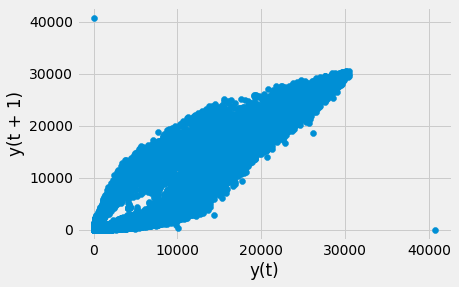

In [29]:
pd.plotting.lag_plot(time_df['Megawatthours'])

## Autocorrelation plot

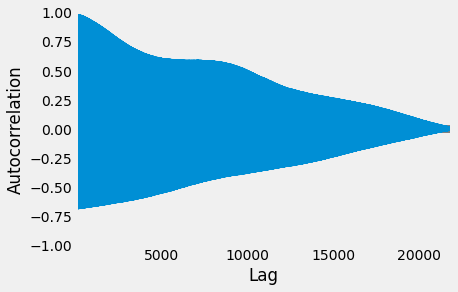

In [30]:
pd.plotting.autocorrelation_plot(time_df)

## Plot of 6 and 12 month Simple Moving Average analysis

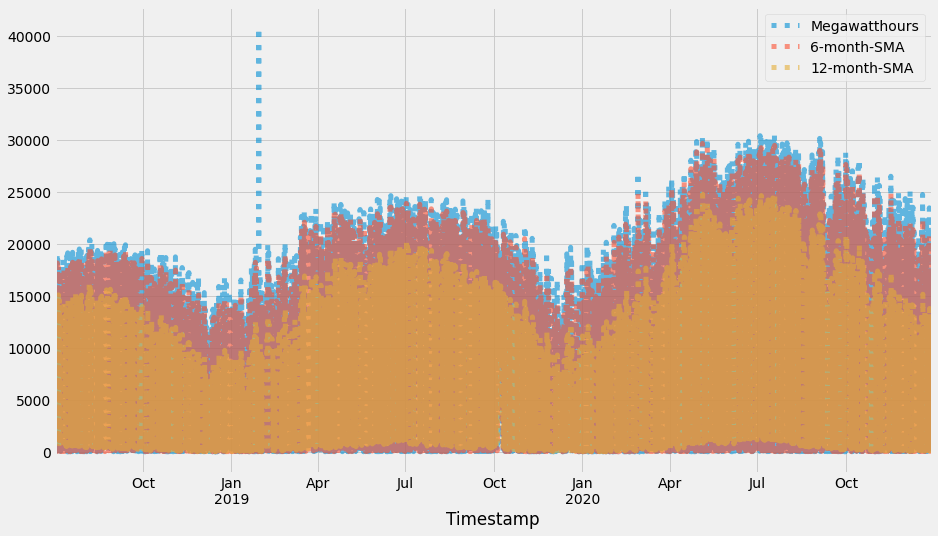

In [34]:
time_df['6-month-SMA'] = time_df['Megawatthours'].rolling(window=6).mean()
time_df['12-month-SMA'] = time_df['Megawatthours'].rolling(window=12).mean()

time_df.plot(ls=":", lw=5, figsize=(14,8), alpha=0.6)

# Feature engineering

## Boxcox transform

In [32]:
from scipy.stats import boxcox

In [ ]:
time_df['Megawatthours'], lam = boxcox(time_df['Megawatthours'])
print('Lambda %f' % lam)

## Creating date-time month and day columns

In [ ]:
time_df['month'] = [time_df.index[i].month for i in range(len(time_df))] 
time_df['day'] = [time_df.index[i].day for i in range(len(time_df))]

time_df.head()

In [ ]:
time_df.tail()

## Lag-based features

In [ ]:
# lag_df = time_df.copy()

# series_vals = pd.DataFrame(lag_df['Megawatthours'].values)

# shifts = [mwh.shift(3),mwh.shift(2), mwh.shift(1)]

# windows = [mwh.shift(1).rolling(window=12), mwh.shift(1).rolling(24), ]

# lag_df = pd.concat([mwh.shift(3),mwh.shift(2), mwh.shift(1),mwh],axis=1)

# lag_df.columns=['t-2','t-1','t','t+1']

# lag_df.head()

## Sliding and expanding window summary statistics features